In [24]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [48]:
from sklearn import model_selection

In [3]:
df = pd.read_csv("winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


this could either be a classical regression problem or a classification problem

In [8]:
print(df.shape)

(1599, 12)


In [5]:
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

In [6]:
df.loc[:,'quality'] = df.quality.map(quality_mapping)

nueral network or decision tree

In [12]:
#shuffling the dataframe
df=df.sample(frac=1).reset_index(drop=True) #fraction =1, return the whole dataset

#top 1000 rows selected
df_train = df.head(1000)

#bottom 599 values are selected for testing and validation
df_test = df.tail(599)

decision tree

In [13]:
from sklearn import tree
from sklearn import metrics

In [18]:
#initialize decision tree classifier class
#with a max_depth of 3

clf = tree.DecisionTreeClassifier(max_depth=3)

#choose the columns you want to train on
#these are the features for the model
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar',  'chlorides', 
        'free sulfur dioxide',  'total sulfur dioxide',  'density',  'pH',  'sulphates',  
        'alcohol'] 

#train the model on the provided features
#add mapped quality from before
clf.fit(df_train[cols],df_train.quality)

#accuracy
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

print(train_accuracy, test_accuracy)

0.597 0.5275459098497496


cross validation

In [45]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

train_accuracies = [0.5]
test_accuracies = [0.5]

In [46]:
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    cols = ['fixed acidity','volatile acidity','citric acid','residual sugar',  'chlorides', 
        'free sulfur dioxide',  'total sulfur dioxide',  'density',  'pH',  'sulphates',  
        'alcohol'] 
    clf.fit(df_train[cols],df_train.quality)
    
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

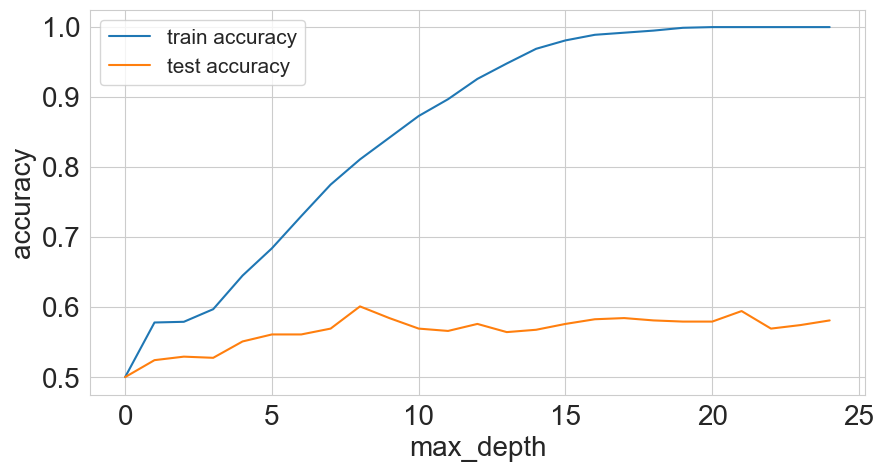

In [47]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")

plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")

plt.legend(loc = 'upper left',prop={'size':15})
plt.xlabel('max_depth',size=20)
plt.ylabel('accuracy',size=20)

plt.show()

test accuracies do not improve; it is called overfitting; it does not generalize on unseen data

Another definition of overfitting would be when the  test loss increases as we keep improving training loss. This is very common when  it comes to neural networks.  

Whenever we train a neural network, we must monitor loss during the training time for both training and test set. If we have a very large network for a dataset which is quite small (i.e. very less number of samples), we will observe that the loss for both training and test set will decrease as we keep training. 

However, at some point, test  loss will reach its minima, and after that, it will start increasing even though training loss decreases further. We must stop training where the validation loss reaches its minimum

Thakur, Abhishek. Approaching (Almost) Any Machine Learning Problem (p. 20). Abhishek Thakur. Kindle Edition. 

#### types of cross validation techniques

1. k-fold cross validation
2. stratified k-fold cross validation
3. hold-out based validation
4. leave one out cross validation
5. group k-fold cross validation

In [ ]:
if __name__=="__main__":
    df = df
    
    df['kfold'] = -1
    df = df.sample(frac=1).reset_index(drop=True)
    
    kf=model_selection.KFold(n_splits=5)
    
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_,'kfold'] = fold
    
    df.to_csv("train_folds.csv", index=False)